<a href="https://colab.research.google.com/github/pushyag1/DataVisualizations/blob/master/Data_Visulizations_using_MatPlotLib_and_Data_Cleaningipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Pandas, numpy, chardet, ascii, string, sys, re, csv,pyplot

import pandas as pd
import numpy as np
import chardet
import string
import sys
import re
import csv
import os
from statistics import median
from statistics import mean
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path_to_file1 = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTxATUFm0tR6Vqq-UAOuqQ-BoQDvYYEe-BmJ20s50yBKDHEifGofP2P1LJ4jWFIu0Pb_4kRhQeyhHmn/pub?gid=0&single=true&output=csv"
data1 = pd.read_csv(path_to_file1, encoding = 'UTF-8')
data1

,adm0_name,iso3,X,Y,published,sources,info,optional1,optional2,optional3,ObjectId
0,Abyei,"SDN, SSD",28.415755,9.786952,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Afghanistan,AFG,66.026881,33.831602,04.08.2020,"<a href=""https://www.gov.uk/foreign-travel-adv...",Latest News:Turkey suspends all flights to Afg...,20200804.0,Self-isolation at own accommodation. \n\nPeopl...,COVID-19 negative certification subject to spe...,2
2,Akrotiri,xUK,32.923365,34.638024,NaN,NaN,NaN,NaN,NaN,NaN,3
3,Aksai Chin,"AKS, CHN",79.132432,35.030488,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Åland Islands,ALA,19.809460,60.154490,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...
285,Yemen,YEM,45.226272,15.225552,14.09.2020,"UNHAS (source: HC/RC protocol , MoH)\n <a href...",International Restrictions: \n All commercial ...,20200914.0,Quarantine requirement at government designate...,COVID-19 negative certification required for e...,286
286,Zambia,ZMB,27.854152,-14.594525,27.08.2020,"<a href=""https://www.gov.uk/foreign-travel-adv...",International Restrictions:\n Commercial fligh...,20200827.0,Quarantine requirement at government designate...,COVID-19 negative certification required for e...,287
287,Zimbabwe,ZWE,29.869096,-19.000755,16.09.2020,"<a href=""https://www.osac.gov/Content/Browse/R...",Latest News: Government lifts ban on inter-cit...,20200916.0,Quarantine requirement at government designate...,COVID-19 negative certification required for e...,288
288,Kosovo,RKS,20.966191,42.467542,29.07.2020,"<a href=""https://www.gov.uk/foreign-travel-adv...",International Restrictions:\n Commercial fligh...,20200729.0,No Requirement. \nThere are no requirements to...,COVID-19 negative certification required for e...,289


In [3]:

path_to_file2 = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTxATUFm0tR6Vqq-UAOuqQ-BoQDvYYEe-BmJ20s50yBKDHEifGofP2P1LJ4jWFIu0Pb_4kRhQeyhHmn/pub?gid=646351539&single=true&output=csv"
data2 = pd.read_csv(path_to_file2, encoding = 'UTF-8')
data2

,adm0_name,iso3,X,Y,published,source,airline,info,optional1,optional2,optional3,ObjectId
0,Cocos (Keeling) Islands,CCK,96.829094,-12.184390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Colombia,COL,-73.079481,3.904939,20.07.2020,https://www.routesonline.com/news/38/airlinero...,Avianca,Avianca Colombia Sep/Oct 2020 International ne...,NaN,NaN,NaN,2
2,Colombia,COL,-73.079481,3.904939,23.07.2020,https://www.routesonline.com/news/38/airlinero...,Avianca,Avianca Sep/Oct 2020 Colombia International op...,NaN,NaN,NaN,3
3,Colombia,COL,-73.079481,3.904939,27.07.2020,https://www.routesonline.com/news/38/airlinero...,Avianca,Avianca Central America Aug – Oct 2020 operati...,NaN,NaN,NaN,4
4,Colombia,COL,-73.079481,3.904939,27.07.2020,https://www.routesonline.com/news/38/airlinero...,Avianca,Avianca revises one-time Shanghai / Tokyo oper...,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Western Sahara,ESH,-13.135324,24.662235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1149
1149,Yemen,YEM,45.226272,15.225552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150
1150,Zambia,ZMB,27.854152,-14.594525,01.07.2020,https://www.routesonline.com/news/38/airlinero...,ProFlight Zambia,ProFlight Zambia July/August 2020 Interim oper...,NaN,NaN,NaN,1151
1151,Zambia,ZMB,27.854152,-14.594525,29.07.2020,https://www.routesonline.com/news/38/airlinero...,ProFlight Zambia,ProFlight Zambia 2H20 International network ca...,NaN,NaN,NaN,1152


In [4]:

data2=data2.drop(columns=['optional1'])
data2=data2.drop(columns=['optional2'])
data2=data2.drop(columns=['optional3'])

In [5]:
data1.shape

(290, 11)

In [6]:
data2.shape

(1153, 9)

In [7]:
data1.columns

Index(['adm0_name', 'iso3', 'X', 'Y', 'published', 'sources', 'info',
       'optional1', 'optional2', 'optional3', 'ObjectId'],
      dtype='object')

In [8]:
data2.columns

Index(['adm0_name', 'iso3', 'X', 'Y', 'published', 'source', 'airline', 'info',
       'ObjectId'],
      dtype='object')

In [9]:
data1=data1.rename(columns={"sources": "source"})


In [10]:
data1.columns

Index(['adm0_name', 'iso3', 'X', 'Y', 'published', 'source', 'info',
       'optional1', 'optional2', 'optional3', 'ObjectId'],
      dtype='object')

In [11]:
data1=data1.rename(columns={"optional1": "Date"})
data1=data1.rename(columns={"optional2": "Quarantine_requirement"})
data1=data1.rename(columns={"optional3": "Certificate_Requirement"})


In [12]:
data1=data1.rename(columns={"adm0_name":"Country"})
data1=data1.rename(columns={'iso3':"Country_Code"})
data2=data2.rename(columns={"adm0_name":"Country"})
data2=data2.rename(columns={'iso3':"Country_Code"})

In [13]:
data1.head()

,Country,Country_Code,X,Y,published,source,info,Date,Quarantine_requirement,Certificate_Requirement,ObjectId
0,Abyei,"SDN, SSD",28.415755,9.786952,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Afghanistan,AFG,66.026881,33.831602,04.08.2020,"<a href=""https://www.gov.uk/foreign-travel-adv...",Latest News:Turkey suspends all flights to Afg...,20200804.0,Self-isolation at own accommodation. \n\nPeopl...,COVID-19 negative certification subject to spe...,2
2,Akrotiri,xUK,32.923365,34.638024,NaN,NaN,NaN,NaN,NaN,NaN,3
3,Aksai Chin,"AKS, CHN",79.132432,35.030488,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Åland Islands,ALA,19.809460,60.154490,NaN,NaN,NaN,NaN,NaN,NaN,5


In [14]:
data2.head()

,Country,Country_Code,X,Y,published,source,airline,info,ObjectId
0,Cocos (Keeling) Islands,CCK,96.829094,-12.184390,NaN,NaN,NaN,NaN,1
1,Colombia,COL,-73.079481,3.904939,20.07.2020,https://www.routesonline.com/news/38/airlinero...,Avianca,Avianca Colombia Sep/Oct 2020 International ne...,2
2,Colombia,COL,-73.079481,3.904939,23.07.2020,https://www.routesonline.com/news/38/airlinero...,Avianca,Avianca Sep/Oct 2020 Colombia International op...,3
3,Colombia,COL,-73.079481,3.904939,27.07.2020,https://www.routesonline.com/news/38/airlinero...,Avianca,Avianca Central America Aug – Oct 2020 operati...,4
4,Colombia,COL,-73.079481,3.904939,27.07.2020,https://www.routesonline.com/news/38/airlinero...,Avianca,Avianca revises one-time Shanghai / Tokyo oper...,5


In [15]:
data1.dtypes

Country                     object
Country_Code                object
X                          float64
Y                          float64
published                   object
source                      object
info                        object
Date                       float64
Quarantine_requirement      object
Certificate_Requirement     object
ObjectId                     int64
dtype: object

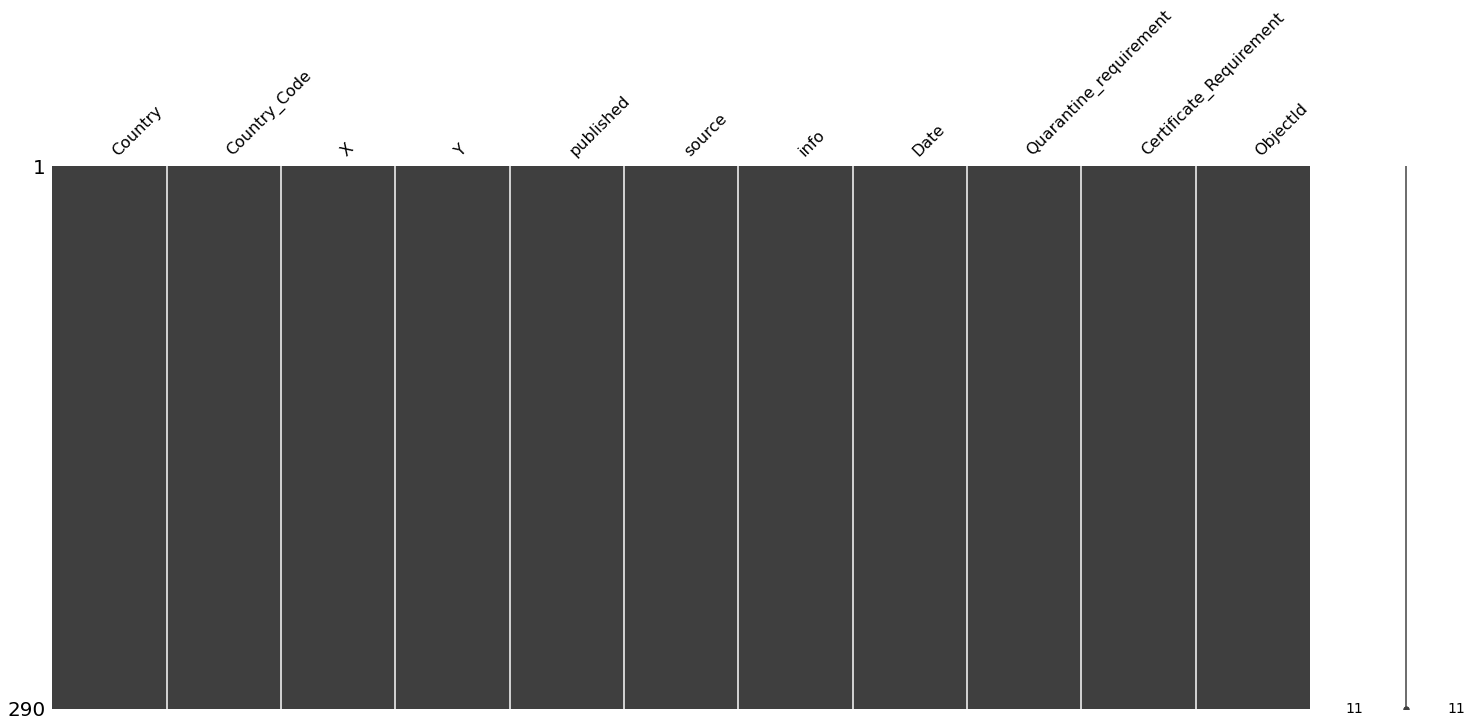

In [16]:
import missingno as msno
msno.matrix(data1.isnull())

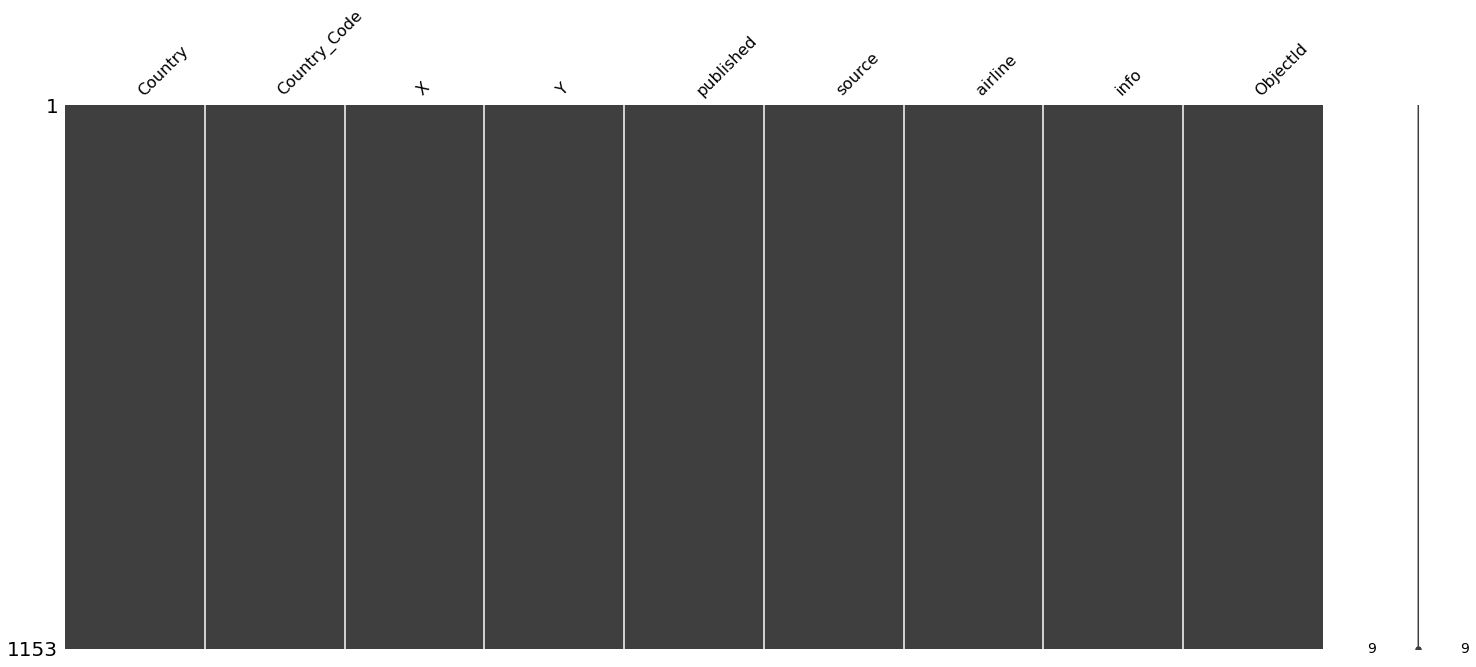

In [17]:
msno.matrix(data2.isnull())

In [18]:
data1=data1.drop(columns=['ObjectId'])
data2=data2.drop(columns=['ObjectId'])

In [19]:
#converting the date column to date time format

data1.Date = pd.to_datetime(data1.Date, format='%Y%m%d', errors='ignore')

In [20]:
data1.head(10)

,Country,Country_Code,X,Y,published,source,info,Date,Quarantine_requirement,Certificate_Requirement
0,Abyei,"SDN, SSD",28.415755,9.786952,NaN,NaN,NaN,NaT,NaN,NaN
1,Afghanistan,AFG,66.026881,33.831602,04.08.2020,"<a href=""https://www.gov.uk/foreign-travel-adv...",Latest News:Turkey suspends all flights to Afg...,2020-08-04,Self-isolation at own accommodation. \n\nPeopl...,COVID-19 negative certification subject to spe...
2,Akrotiri,xUK,32.923365,34.638024,NaN,NaN,NaN,NaT,NaN,NaN
3,Aksai Chin,"AKS, CHN",79.132432,35.030488,NaN,NaN,NaN,NaT,NaN,NaN
4,Åland Islands,ALA,19.809460,60.154490,NaN,NaN,NaN,NaT,NaN,NaN
5,Albania,ALB,20.066643,41.138926,29.07.2020,"<a href=""https://www.gov.uk/foreign-travel-adv...",International Restrictions:\n Commercial airli...,2020-07-29,Quarantine requirement at government designate...,COVID-19 negative certification not required /...
6,Algeria,DZA,2.678028,28.157361,14.09.2020,"<a href=""https://www.gov.uk/foreign-travel-adv...",International Restrictions: \n On 28 June the ...,2020-09-14,Quarantine requirement at government designate...,COVID-19 negative certification not required /...
7,American Samoa,ASM,-170.718060,-14.300686,29.07.2020,"<a href=""https://www.americansamoa.gov/immigra...",International Restrictions:\n To prevent the s...,2020-07-29,Quarantine Requirement outside territory. \n\n...,COVID-19 negative certification required for e...
8,Andorra,AND,1.576279,42.545479,02.07.2020,"<a href=""https://www.gov.uk/foreign-travel-adv...",International Restrictions: \n Andorra is a la...,2020-07-02,No requirement.\n\n,COVID-19 negative certification not required /...
9,Angola,AGO,17.577532,-12.337524,04.09.2020,"<a href=""https://www.osac.gov/Content/Browse/R...",Latest News: Domestic and international non-co...,2020-09-04,Quarantine requirement at government designate...,COVID-19 negative certification required for e...


In [21]:
#checking for any null values present in the data set

data1.isnull().sum()

Country                     0
Country_Code                0
X                           0
Y                           0
published                  54
source                     54
info                       54
Date                       54
Quarantine_requirement     55
Certificate_Requirement    58
dtype: int64

In [22]:
data2.isnull().sum()

Country           0
Country_Code      0
X                 0
Y                 0
published       155
source          155
airline         155
info            156
dtype: int64

In [23]:
data1['month'] = pd.DatetimeIndex(data1['Date']).month
data1.head()

,Country,Country_Code,X,Y,published,source,info,Date,Quarantine_requirement,Certificate_Requirement,month
0,Abyei,"SDN, SSD",28.415755,9.786952,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,Afghanistan,AFG,66.026881,33.831602,04.08.2020,"<a href=""https://www.gov.uk/foreign-travel-adv...",Latest News:Turkey suspends all flights to Afg...,2020-08-04,Self-isolation at own accommodation. \n\nPeopl...,COVID-19 negative certification subject to spe...,8.0
2,Akrotiri,xUK,32.923365,34.638024,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,Aksai Chin,"AKS, CHN",79.132432,35.030488,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,Åland Islands,ALA,19.809460,60.154490,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [24]:
data1['year'] = pd.DatetimeIndex(data1['Date']).year
data1.head()

,Country,Country_Code,X,Y,published,source,info,Date,Quarantine_requirement,Certificate_Requirement,month,year
0,Abyei,"SDN, SSD",28.415755,9.786952,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,66.026881,33.831602,04.08.2020,"<a href=""https://www.gov.uk/foreign-travel-adv...",Latest News:Turkey suspends all flights to Afg...,2020-08-04,Self-isolation at own accommodation. \n\nPeopl...,COVID-19 negative certification subject to spe...,8.0,2020.0
2,Akrotiri,xUK,32.923365,34.638024,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,Aksai Chin,"AKS, CHN",79.132432,35.030488,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,Åland Islands,ALA,19.809460,60.154490,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [25]:
data1.dtypes

Country                            object
Country_Code                       object
X                                 float64
Y                                 float64
published                          object
source                             object
info                               object
Date                       datetime64[ns]
Quarantine_requirement             object
Certificate_Requirement            object
month                             float64
year                              float64
dtype: object

In [26]:
data1.columns

Index(['Country', 'Country_Code', 'X', 'Y', 'published', 'source', 'info',
       'Date', 'Quarantine_requirement', 'Certificate_Requirement', 'month',
       'year'],
      dtype='object')

In [27]:
data2.columns

Index(['Country', 'Country_Code', 'X', 'Y', 'published', 'source', 'airline',
       'info'],
      dtype='object')

In [28]:
data3=data2["Country"],data2["airline"]

In [29]:
data3=pd.DataFrame(data3).T
data3.head()

,Country,airline
0,Cocos (Keeling) Islands,NaN
1,Colombia,Avianca
2,Colombia,Avianca
3,Colombia,Avianca
4,Colombia,Avianca


In [30]:
data = pd.merge(data1, data3, on="Country", how = 'inner')

In [31]:
data.shape

(1144, 13)

In [32]:
data.columns

Index(['Country', 'Country_Code', 'X', 'Y', 'published', 'source', 'info',
       'Date', 'Quarantine_requirement', 'Certificate_Requirement', 'month',
       'year', 'airline'],
      dtype='object')

In [33]:
data.head(2)

,Country,Country_Code,X,Y,published,source,info,Date,Quarantine_requirement,Certificate_Requirement,month,year,airline
0,Abyei,"SDN, SSD",28.415755,9.786952,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,66.026881,33.831602,04.08.2020,"<a href=""https://www.gov.uk/foreign-travel-adv...",Latest News:Turkey suspends all flights to Afg...,2020-08-04,Self-isolation at own accommodation. \n\nPeopl...,COVID-19 negative certification subject to spe...,8.0,2020.0,NaN


In [34]:
data.columns

Index(['Country', 'Country_Code', 'X', 'Y', 'published', 'source', 'info',
       'Date', 'Quarantine_requirement', 'Certificate_Requirement', 'month',
       'year', 'airline'],
      dtype='object')

In [35]:
data.head()

,Country,Country_Code,X,Y,published,source,info,Date,Quarantine_requirement,Certificate_Requirement,month,year,airline
0,Abyei,"SDN, SSD",28.415755,9.786952,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,66.026881,33.831602,04.08.2020,"<a href=""https://www.gov.uk/foreign-travel-adv...",Latest News:Turkey suspends all flights to Afg...,2020-08-04,Self-isolation at own accommodation. \n\nPeopl...,COVID-19 negative certification subject to spe...,8.0,2020.0,NaN
2,Aksai Chin,"AKS, CHN",79.132432,35.030488,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,Åland Islands,ALA,19.809460,60.154490,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,Albania,ALB,20.066643,41.138926,29.07.2020,"<a href=""https://www.gov.uk/foreign-travel-adv...",International Restrictions:\n Commercial airli...,2020-07-29,Quarantine requirement at government designate...,COVID-19 negative certification not required /...,7.0,2020.0,NaN


In [36]:
data.month.unique()

array([nan,  8.,  7.,  9.,  6.,  5.,  4.])

In [37]:
data.dropna(subset = ["airline"], inplace=True)
data.dropna(subset = ["month"], inplace=True)

In [38]:
data.shape

(989, 13)

In [39]:
column_names = data.columns
for i in column_names:
    print('{} is unique: {}'.format(i, data[i].is_unique))

Country is unique: False
Country_Code is unique: False
X is unique: False
Y is unique: False
published is unique: False
source is unique: False
info is unique: False
Date is unique: False
Quarantine_requirement is unique: False
Certificate_Requirement is unique: False
month is unique: False
year is unique: False
airline is unique: False


In [40]:
data.shape

(989, 13)

In [41]:
look_up = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'Apr', 5.0: 'May',6.0: 'Jun', 7.0: 'Jul', 8.0: 'Aug', 9.0: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

data['month'] = data['month'].apply(lambda x: look_up[x])
data.head()

,Country,Country_Code,X,Y,published,source,info,Date,Quarantine_requirement,Certificate_Requirement,month,year,airline
8,Angola,AGO,17.577532,-12.337524,04.09.2020,"<a href=""https://www.osac.gov/Content/Browse/R...",Latest News: Domestic and international non-co...,2020-09-04,Quarantine requirement at government designate...,COVID-19 negative certification required for e...,Sep,2020.0,TAAG
9,Angola,AGO,17.577532,-12.337524,04.09.2020,"<a href=""https://www.osac.gov/Content/Browse/R...",Latest News: Domestic and international non-co...,2020-09-04,Quarantine requirement at government designate...,COVID-19 negative certification required for e...,Sep,2020.0,TAAG
13,Argentina,ARG,-63.578123,-31.578414,08.09.2020,"<a href=""https://ar.usembassy.gov/covid-19/"">U...",Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation at own accommodation. \n\nAny f...,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas
14,Argentina,ARG,-63.578123,-31.578414,08.09.2020,"<a href=""https://ar.usembassy.gov/covid-19/"">U...",Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation at own accommodation. \n\nAny f...,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas
15,Argentina,ARG,-63.578123,-31.578414,08.09.2020,"<a href=""https://ar.usembassy.gov/covid-19/"">U...",Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation at own accommodation. \n\nAny f...,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas


In [42]:

data=data.drop(columns=['source'])


In [43]:
data.head()

,Country,Country_Code,X,Y,published,info,Date,Quarantine_requirement,Certificate_Requirement,month,year,airline
8,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine requirement at government designate...,COVID-19 negative certification required for e...,Sep,2020.0,TAAG
9,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine requirement at government designate...,COVID-19 negative certification required for e...,Sep,2020.0,TAAG
13,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation at own accommodation. \n\nAny f...,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas
14,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation at own accommodation. \n\nAny f...,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas
15,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation at own accommodation. \n\nAny f...,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas


In [44]:

#data=data.drop(columns=['Date'])


In [45]:
data["Quarantine_requirement"] = data['Quarantine_requirement'].str.split().str[0]


In [46]:
data.head()

,Country,Country_Code,X,Y,published,info,Date,Quarantine_requirement,Certificate_Requirement,month,year,airline
8,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,COVID-19 negative certification required for e...,Sep,2020.0,TAAG
9,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,COVID-19 negative certification required for e...,Sep,2020.0,TAAG
13,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas
14,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas
15,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas


In [47]:
data.head()

,Country,Country_Code,X,Y,published,info,Date,Quarantine_requirement,Certificate_Requirement,month,year,airline
8,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,COVID-19 negative certification required for e...,Sep,2020.0,TAAG
9,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,COVID-19 negative certification required for e...,Sep,2020.0,TAAG
13,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas
14,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas
15,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas


In [48]:
#


In [49]:
#data["Certificate_Requirement"] = data['Certificate_Requirement'].str.split().str[:4]


In [50]:
data.head()

,Country,Country_Code,X,Y,published,info,Date,Quarantine_requirement,Certificate_Requirement,month,year,airline
8,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,COVID-19 negative certification required for e...,Sep,2020.0,TAAG
9,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,COVID-19 negative certification required for e...,Sep,2020.0,TAAG
13,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas
14,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas
15,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not required /...,Sep,2020.0,Aerolineas Argentinas


In [51]:
data['Certificate_Requirement']=data['Certificate_Requirement'].apply(lambda x: ' '.join(x.split()[:4]))

In [52]:
data.head()

,Country,Country_Code,X,Y,published,info,Date,Quarantine_requirement,Certificate_Requirement,month,year,airline
8,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,COVID-19 negative certification required,Sep,2020.0,TAAG
9,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,COVID-19 negative certification required,Sep,2020.0,TAAG
13,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not,Sep,2020.0,Aerolineas Argentinas
14,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not,Sep,2020.0,Aerolineas Argentinas
15,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not,Sep,2020.0,Aerolineas Argentinas


In [53]:
data=data.rename(columns={"Certificate_Requirement": "covid_negativeCertificate"})

In [54]:
data.head()

,Country,Country_Code,X,Y,published,info,Date,Quarantine_requirement,covid_negativeCertificate,month,year,airline
8,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,COVID-19 negative certification required,Sep,2020.0,TAAG
9,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,COVID-19 negative certification required,Sep,2020.0,TAAG
13,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not,Sep,2020.0,Aerolineas Argentinas
14,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not,Sep,2020.0,Aerolineas Argentinas
15,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,COVID-19 negative certification not,Sep,2020.0,Aerolineas Argentinas


In [55]:
data['covid_negativeCertificate']=data['covid_negativeCertificate'].replace('COVID-19 negative certification required','Required')

In [56]:
data['covid_negativeCertificate']=data['covid_negativeCertificate'].replace('COVID-19 negative certification not','Not Required')

In [57]:
data.head()

,Country,Country_Code,X,Y,published,info,Date,Quarantine_requirement,covid_negativeCertificate,month,year,airline
8,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,Required,Sep,2020.0,TAAG
9,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,Required,Sep,2020.0,TAAG
13,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,Not Required,Sep,2020.0,Aerolineas Argentinas
14,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,Not Required,Sep,2020.0,Aerolineas Argentinas
15,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,Not Required,Sep,2020.0,Aerolineas Argentinas


In [58]:
data['covid_negativeCertificate']=data['covid_negativeCertificate'].replace('COVID-19 negative certification required.','Required')

In [59]:
data['covid_negativeCertificate']=data['covid_negativeCertificate'].replace('COVID-19 negative certification required-','Required')

In [60]:
data['covid_negativeCertificate']=data['covid_negativeCertificate'].replace('COVID-19 negative certification subject','Special_Conditions')

In [61]:
data['covid_negativeCertificate']=data['covid_negativeCertificate'].replace('COVID-19 negative certification is','Required')

In [62]:
data.covid_negativeCertificate.unique()

array(['Required', 'Not Required', 'Special_Conditions'], dtype=object)

In [63]:
data.to_csv("Final2.csv",sep=',')

In [64]:
count = data.groupby(['month', 'Quarantine_requirement']).size() 
count=pd.DataFrame(count)
count

0
month Quarantine_requirement     
Aug   No                        7
      Quarantine               75
      Self-isolation           91
Jul   No                       16
      Quarantine               40
      Self-isolation           29
Jun   Quarantine               18
May   Quarantine                1
Sep   No                       11
      Passengers                1
      Quarantine              260
      Self-isolation          440

In [65]:
count.reset_index(level=0, inplace=True)

In [66]:
count.reset_index(level=0, inplace=True)

In [67]:
#count.head()
count=count.rename(columns={0: "values"})
count

,Quarantine_requirement,month,values
0,No,Aug,7
1,Quarantine,Aug,75
2,Self-isolation,Aug,91
3,No,Jul,16
4,Quarantine,Jul,40
5,Self-isolation,Jul,29
6,Quarantine,Jun,18
7,Quarantine,May,1
8,No,Sep,11
9,Passengers,Sep,1


In [68]:
newf = count.pivot(index='month', columns='Quarantine_requirement')
newf

values                                     
Quarantine_requirement     No Passengers Quarantine Self-isolation
month                                                             
Aug                       7.0        NaN       75.0           91.0
Jul                      16.0        NaN       40.0           29.0
Jun                       NaN        NaN       18.0            NaN
May                       NaN        NaN        1.0            NaN
Sep                      11.0        1.0      260.0          440.0

In [69]:
newf.columns = newf.columns.droplevel(0)

In [70]:
newf.columns.name = ' '

In [71]:
newf.reset_index(level=0, inplace=True)

In [72]:
newf.fillna(0)

,month,No,Passengers,Quarantine,Self-isolation
0,Aug,7.0,0.0,75.0,91.0
1,Jul,16.0,0.0,40.0,29.0
2,Jun,0.0,0.0,18.0,0.0
3,May,0.0,0.0,1.0,0.0
4,Sep,11.0,1.0,260.0,440.0


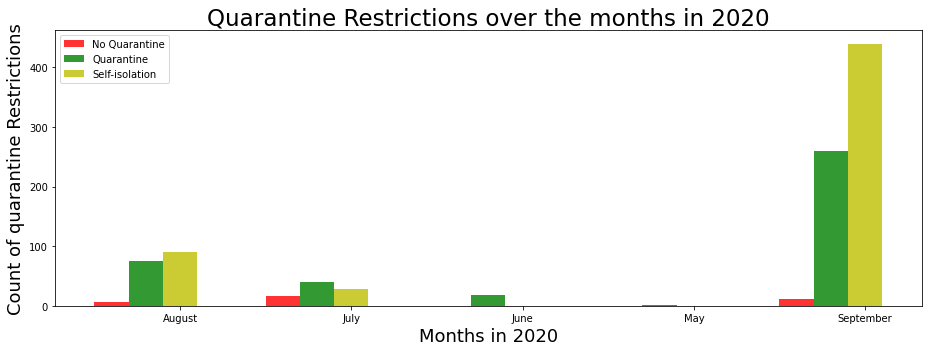

In [73]:
#plotting a grouped bar graph to check the death rates and comparing the HIV and Non-Hiv related death rates.

n_groups = 5
fig, ax = plt.subplots(figsize=(13,5))
bar_width = 0.20
opacity = 0.8
index = np.arange(n_groups)

rects1 = plt.bar(index - bar_width, newf['No'], bar_width,alpha=opacity,color='r',label='No Quarantine')
rects2 = plt.bar(index, newf['Quarantine'], bar_width,alpha=opacity,color='g',label='Quarantine')
rects3 = plt.bar(index + bar_width, newf['Self-isolation'], bar_width,alpha=opacity,color='y',label='Self-isolation')
plt.xlabel('Months in 2020', fontsize=18)
plt.ylabel('Count of quarantine Restrictions', fontsize=18)
plt.title('Quarantine Restrictions over the months in 2020',fontsize=23)
plt.xticks(index + bar_width, ('August', 'July', 'June', 'May', 'September'))
plt.legend()
plt.tight_layout()
plt.show()

#citation: https://pythonspot.com/matplotlib-bar-chart/
#citation: https://stackoverflow.com/questions/47838680/matplotlib-xticks-values-in-bar-chart
#citation: https://stackoverflow.com/questions/51080491/matplotlib-how-to-change-figsize-for-double-bar-plot/51081443
#citation:https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars

In [90]:
data.head()

,Country,Country_Code,X,Y,published,info,Date,Quarantine_requirement,covid_negativeCertificate,month,year,airline
8,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,Required,Sep,2020.0,TAAG
9,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,Required,Sep,2020.0,TAAG
13,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,Not Required,Sep,2020.0,Aerolineas Argentinas
14,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,Not Required,Sep,2020.0,Aerolineas Argentinas
15,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,Not Required,Sep,2020.0,Aerolineas Argentinas


In [106]:
data_new=data[data['Quarantine_requirement'] == 'Self-isolation']
data_new = data_new.reset_index(drop=True)
data_new

,Country,Country_Code,X,Y,published,info,Date,Quarantine_requirement,covid_negativeCertificate,month,year,airline
0,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,Not Required,Sep,2020.0,Aerolineas Argentinas
1,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,Not Required,Sep,2020.0,Aerolineas Argentinas
2,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,Not Required,Sep,2020.0,Aerolineas Argentinas
3,Aruba,ABW,-69.970272,12.509110,29.07.2020,International Restrictions:\n Aruba reopened i...,2020-07-29,Self-isolation,Required,Jul,2020.0,Aruba Airlines
4,Austria,AUT,14.141702,47.587050,14.09.2020,Latest News:Austria is expanding its travel wa...,2020-09-14,Self-isolation,Special_Conditions,Sep,2020.0,Austrian Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...
555,United States of America,USA,-99.446708,39.403990,14.09.2020,Latest News: Tri-state officials add Delaware...,2020-09-14,Self-isolation,Special_Conditions,Sep,2020.0,Sun Country
556,United States of America,USA,-99.446708,39.403990,14.09.2020,Latest News: Tri-state officials add Delaware...,2020-09-14,Self-isolation,Special_Conditions,Sep,2020.0,Sun Country
557,United States of America,USA,-99.446708,39.403990,14.09.2020,Latest News: Tri-state officials add Delaware...,2020-09-14,Self-isolation,Special_Conditions,Sep,2020.0,Frontier Airlines
558,United States of America,USA,-99.446708,39.403990,14.09.2020,Latest News: Tri-state officials add Delaware...,2020-09-14,Self-isolation,Special_Conditions,Sep,2020.0,Allegiant Air


In [ ]:
df1 = data_new.groupby("Country" ,as_index = False).agg({"Quarantine_requirement": "count"})
df1.columns = ["Country","Quarantine_requirement"]
df1

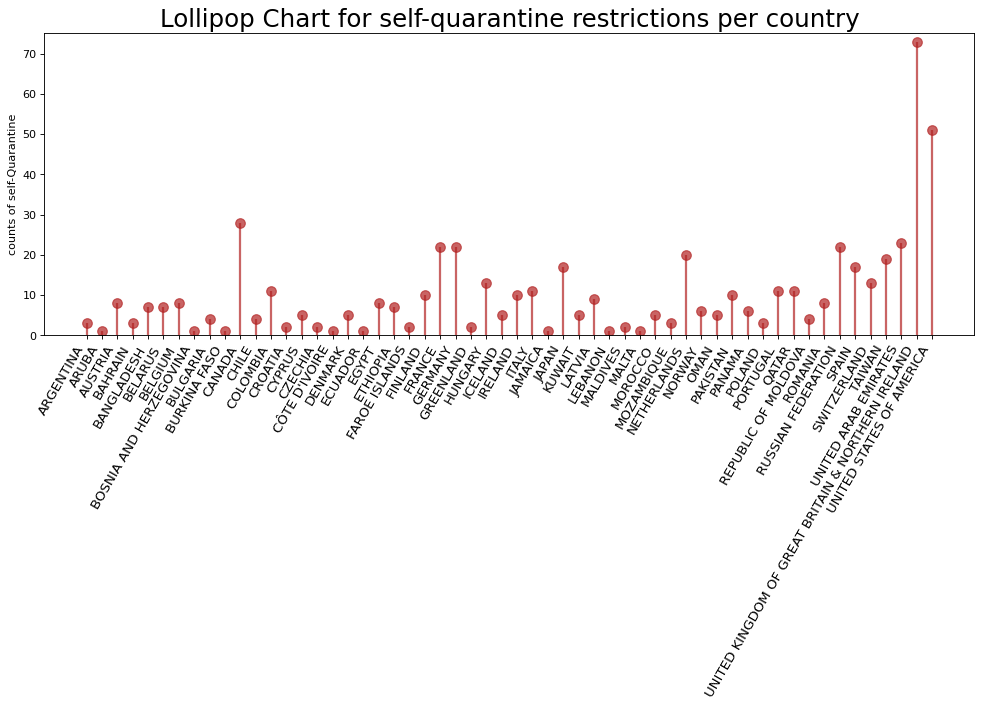

In [111]:

# Draw plot
fig, ax = plt.subplots(figsize=(15,5), dpi= 80)
ax.vlines(x=df1['Country'], ymin=0, ymax=df1['Quarantine_requirement'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df1['Country'], y=df1['Quarantine_requirement'], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for self-quarantine restrictions per country', fontdict={'size':22})
ax.set_ylabel('counts of self-Quarantine')
ax.set_xticks(df1['Country'])
ax.set_xticklabels(df1['Country'].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 75)

plt.show()

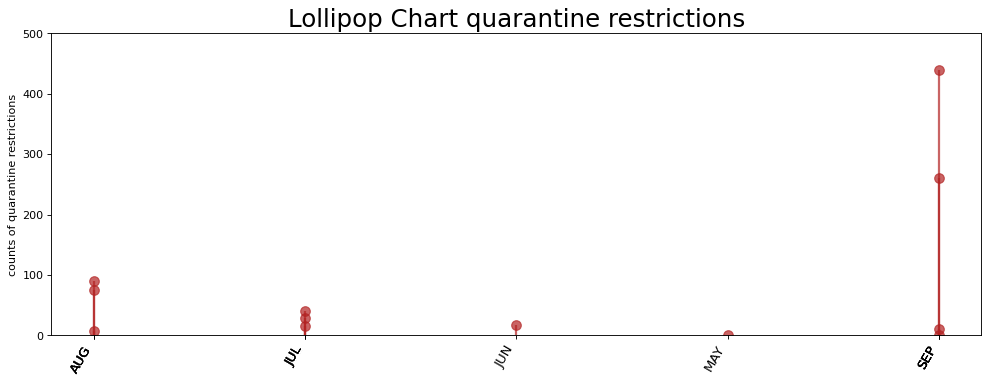

In [75]:

# Draw plot
fig, ax = plt.subplots(figsize=(15,5), dpi= 80)
ax.vlines(x=count['month'], ymin=0, ymax=count['values'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=count['month'], y=count['values'], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart quarantine restrictions', fontdict={'size':22})
ax.set_ylabel('counts of quarantine restrictions')
ax.set_xticks(count['month'])
ax.set_xticklabels(count['month'].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 500)

plt.show()

In [76]:
data.head()

,Country,Country_Code,X,Y,published,info,Date,Quarantine_requirement,covid_negativeCertificate,month,year,airline
8,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,Required,Sep,2020.0,TAAG
9,Angola,AGO,17.577532,-12.337524,04.09.2020,Latest News: Domestic and international non-co...,2020-09-04,Quarantine,Required,Sep,2020.0,TAAG
13,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,Not Required,Sep,2020.0,Aerolineas Argentinas
14,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,Not Required,Sep,2020.0,Aerolineas Argentinas
15,Argentina,ARG,-63.578123,-31.578414,08.09.2020,Latest News:Argentine government authorizes so...,2020-09-08,Self-isolation,Not Required,Sep,2020.0,Aerolineas Argentinas


In [77]:
count1 = data.groupby(['Country', 'airline']).size() 
count1=pd.DataFrame(count1)
count1

0
Country   airline                 
Angola    TAAG                   2
Argentina Aerolineas Argentinas  3
Aruba     Aruba Airlines         1
Australia Airnorth               1
          FlyPelican             2
...                             ..
Viet Nam  Bamboo Airways         2
          Viet Nam Airlines      5
          Vietjet Air            1
Zambia    ProFlight Zambia       2
Zimbabwe  Air Zimbabwe           1

[371 rows x 1 columns]

In [78]:
count1.reset_index(level=0, inplace=True)

In [79]:
count1.reset_index(level=0, inplace=True)

In [80]:
count1

,airline,Country,0
0,TAAG,Angola,2
1,Aerolineas Argentinas,Argentina,3
2,Aruba Airlines,Aruba,1
3,Airnorth,Australia,1
4,FlyPelican,Australia,2
...,...,...,...
366,Bamboo Airways,Viet Nam,2
367,Viet Nam Airlines,Viet Nam,5
368,Vietjet Air,Viet Nam,1
369,ProFlight Zambia,Zambia,2


In [81]:
count1=count1.rename(columns={0: "values"})

In [82]:
sumB=data.groupby('Country', as_index=False).agg({"airline": "count"})
sumB

,Country,airline
0,Angola,2
1,Argentina,3
2,Aruba,1
3,Australia,18
4,Austria,8
...,...,...
127,Vanuatu,1
128,Venezuela,1
129,Viet Nam,8
130,Zambia,2


In [83]:
SumC=data['Country'].unique(),data['month']

SumC=pd.DataFrame(SumC).T

SumC=SumC.rename(columns={0: "Country",1:"month"})
SumC.dropna()

,Country,month
0,Angola,Sep
1,Argentina,Sep
2,Aruba,Sep
3,Australia,Sep
4,Austria,Sep
...,...,...
127,Vanuatu,Sep
128,Venezuela,Sep
129,Viet Nam,Sep
130,Zambia,Sep


In [84]:
sumD=data['covid_negativeCertificate'],data['Country'].unique()
sumD=pd.DataFrame(sumD).T
sumD=sumD.rename(columns={"Unnamed 0":"Country"})
sumD.dropna()

,covid_negativeCertificate,Country
8,Required,Bangladesh
9,Required,Barbados
13,Not Required,Bolivia
14,Not Required,Bosnia and Herzegovina
15,Not Required,Botswana
...,...,...
127,Not Required,Vanuatu
128,Not Required,Venezuela
129,Not Required,Viet Nam
130,Not Required,Zambia


In [85]:
merge2=pd.merge(sumB, SumC, on='Country',how='inner')
merge3=pd.merge(merge2, sumD, on='Country',how='inner')
merge3

,Country,airline,month,covid_negativeCertificate
0,Bangladesh,7,Jun,Required
1,Barbados,3,Jun,Required
2,Bolivia,1,Jun,Not Required
3,Bosnia and Herzegovina,1,Jun,Not Required
4,Botswana,1,Jun,Not Required
...,...,...,...,...
100,Vanuatu,1,Sep,Not Required
101,Venezuela,1,Sep,Not Required
102,Viet Nam,8,Sep,Not Required
103,Zambia,2,Sep,Not Required


In [86]:
merge3.columns

Index(['Country', 'airline', 'month', 'covid_negativeCertificate'], dtype='object')

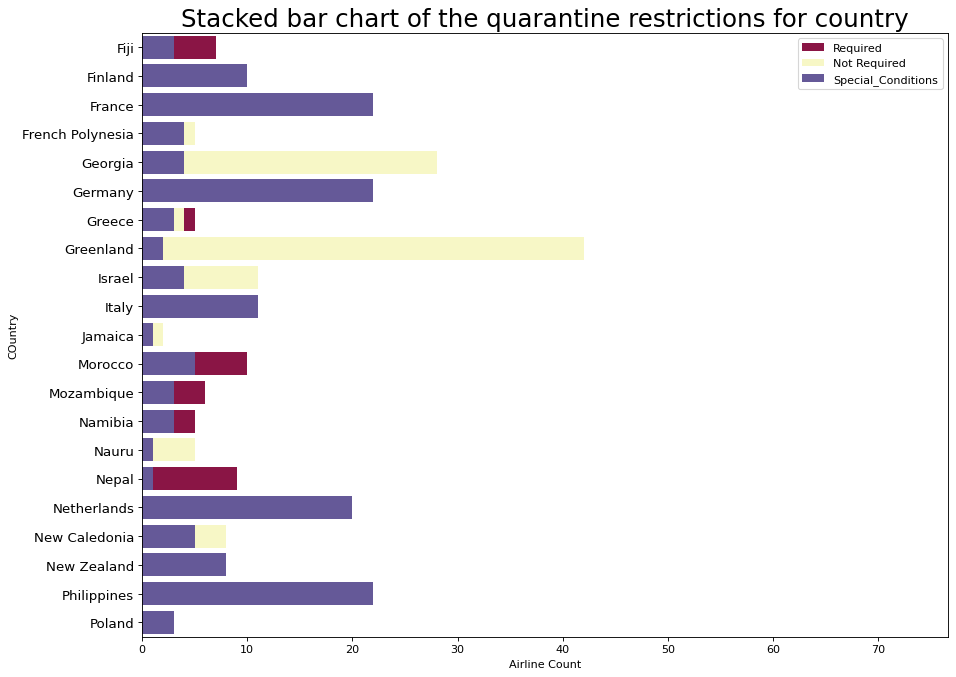

In [113]:


plt.figure(figsize=(13,10), dpi= 80)
group_col = merge3['covid_negativeCertificate']
#order_of_bars = merge3.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(merge3['covid_negativeCertificate'].unique())-1)) for i in range(len(merge3['covid_negativeCertificate'].unique()))]

for c, group in zip(colors, merge3['covid_negativeCertificate'].unique()):
    sns.barplot(x='airline', y='Country', data=merge3.loc[merge3['covid_negativeCertificate']==group, :],  color=c, label=group)

# Decorations    
plt.xlabel("Airline Count")
plt.ylabel("COuntry")
plt.yticks(fontsize=12)
plt.title("Stacked bar chart of the quarantine restrictions for country", fontsize=22)
plt.legend()
plt.show()

In [88]:
#citation : https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/